## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [35]:
df = pd.read_csv('iris.csv')
df.head()
df.tail()
df.value_counts()
df.drop(columns='Id',inplace=True)
df.value_counts
df.describe()
df.info()
df['Species'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


3. Visualize the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

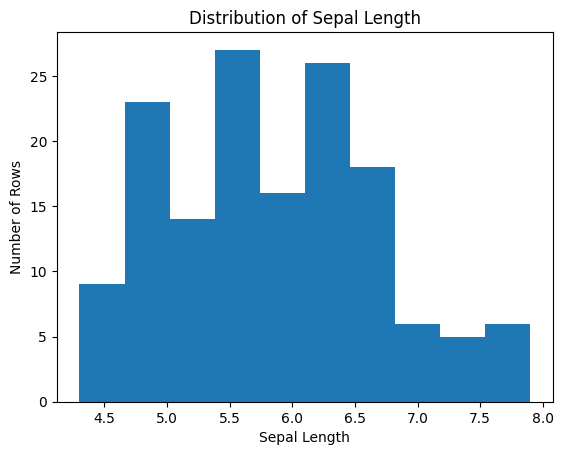

In [37]:
plt.hist(df['SepalLengthCm'])
plt.xlabel('Sepal Length')
plt.ylabel('Number of Rows')
plt.title('Distribution of Sepal Length')
plt.show

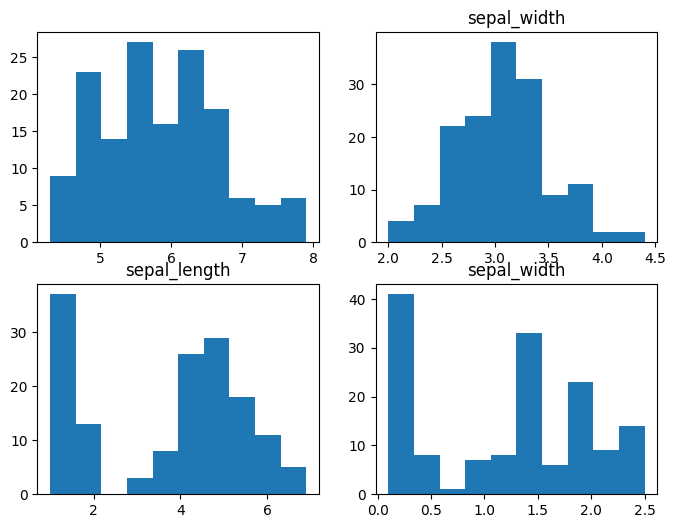

In [38]:
fig, ax = plt.subplots(2,2, figsize = (8,6))
ax [0,0].hist(df ["SepalLengthCm"])
ax [0,1].hist(df ["SepalWidthCm"])
ax [1,0].hist(df ["PetalLengthCm"])
ax [1,1].hist(df ["PetalWidthCm"])

ax [1,1].set_title ("sepal_length")
ax [0,1].set_title("sepal_width")
ax [1,0].set_title("sepal_length")
ax [1,1].set_title("sepal_width")

plt.show()





In [39]:
colors = { 'Iris-setosa': 'purple',
          'Iris-virginica': 'black', 'Iris-versicolor': 'green'}

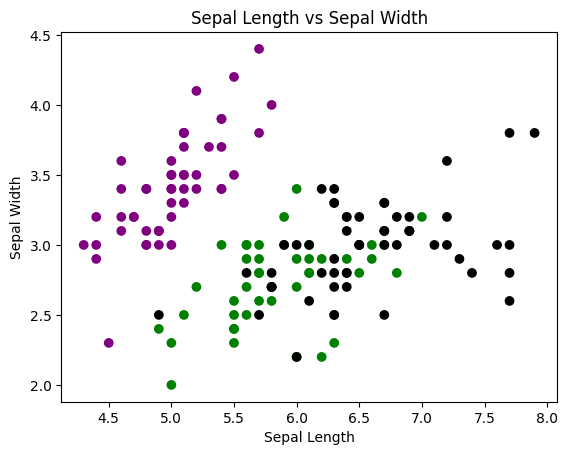

In [40]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'], c=df ['Species'].map(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()

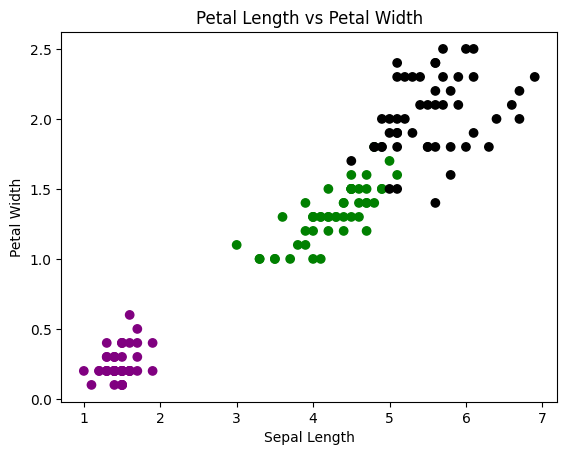

In [41]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'], c=df ['Species'].map(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

4. Split the dataset into a training set and a testing set

In [48]:
X = df.drop(columns = ['Species']).values
y = df ['Species'].values



In [49]:
print(X.ndim)
print(X.shape)
print(y.ndim)
print(y.shape)

2
(150, 4)
1
(150,)


In [50]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_test.shape)

(105, 4)
(105,)
(45, 4)
(45, 4)


5. Train the model

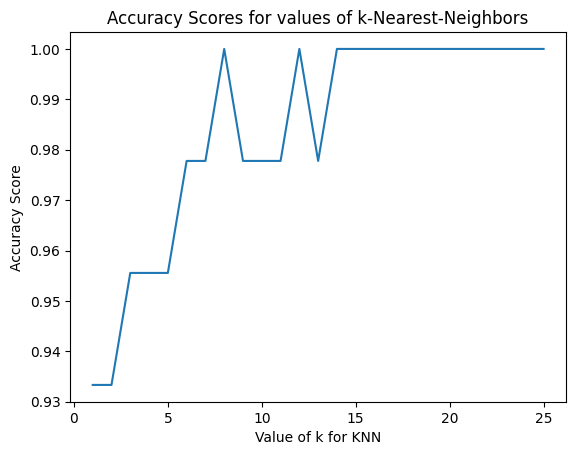

In [51]:
k_range = list(range(1,26))
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_train,y_train)

  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for values of k-Nearest-Neighbors')
plt.show()

6. Test the model

In [52]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
(metrics.accuracy_score(y_test,y_pred))

0.9777777777777777

In [53]:
knn.predict([[6,3,4,2]])

array(['Iris-versicolor'], dtype=object)